In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ex1data2.txt', sep=',', header=None)

In [3]:
df.columns= ['size', 'room', 'price']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X = df[['size', 'room']]
y = df['price']

In [6]:
X.shape

# y.shape

(47, 2)

# Train test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# scaling

In [8]:
scaleX = StandardScaler()

In [9]:
# scaleY = StandardScaler()

In [10]:
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.transform(X_test)

In [11]:
# y_train = scaleY.fit_transform(y_train.values.reshape(-1,1))
# y_test = scaleY.transform(y_test.values.reshape(-1,1))

In [12]:
X_train.shape

(39, 2)

In [13]:
y_train = np.array(y_train.values).reshape(-1,1)
y_test = np.array(y_test.values).reshape(-1,1)

# PARAMS

In [14]:
iter_ = 1000
m=39
n=2
b_curr = 0
m_curr1 = 0
m_curr2 = 0

a = 0.03

# Gradient Descent Algorithm

# For two features

In [15]:
errors_=[]
for i in range(iter_):
    y_pred = X_train[:,0].reshape(m,1) * m_curr1 + b_curr + X_train[:,1].reshape(m,1) * m_curr2
    error= y_pred - y_train
    j = (1/(2*m)) * sum(np.square(error))    
    errors_.append(j)
    b_curr = b_curr - a*(1/m) * sum(error)
    
    m_curr1 = m_curr1 - a*(1/m) * sum(X_train[:,0].reshape(m,1) * error)
    m_curr2 = m_curr2 - a*(1/m) * sum(X_train[:,1].reshape(m,1) * error)  

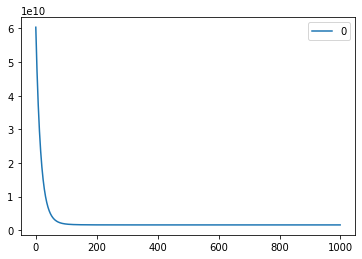

In [16]:
pd.DataFrame(errors_).plot()

In [17]:
m_curr1, m_curr2, b_curr

(array([109194.64053237]), array([-9112.83871553]), array([326848.6153846]))

# Evaluating on Training Data

In [18]:
t_y = X_train[:,0].reshape(m,1) * m_curr1 + b_curr + X_train[:,1].reshape(m,1) * m_curr2

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(y_train, t_y))

55754.649764776994

# Evaluating on Test data

In [21]:
test_y = X_test[:,0].reshape(len(X_test),1) * m_curr1 + b_curr + X_test[:,1].reshape(len(X_test),1) * m_curr2

In [22]:
np.sqrt(mean_squared_error(y_test, test_y))

96645.55868175118

# Normal Equation

In [23]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [24]:
y = np.array(y).reshape(-1,1)
X = np.array(X.values).reshape(-1,2)

In [25]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [26]:
theta_best

array([[  140.86108621],
       [16978.19105903]])

In [27]:
y_prediction = X[:,0].reshape(len(X),1) * theta_best[0] + X[:,1].reshape(len(X),1) * theta_best[1] 

In [28]:
np.sqrt(mean_squared_error(y,y_prediction))

67185.9465997115

# Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
ln = LinearRegression().fit(X_train, y_train)

In [31]:
np.sqrt(mean_squared_error(y_test, ln.predict(X_test)))

96645.62958483692

# SVR

In [32]:
from sklearn.svm import SVR

In [33]:
model = SVR(C=0.001,kernel='rbf').fit(X_train, y_train)

C:\Users\Fida Hussain\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

168150.8918780628

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor(250).fit(X_train, y_train)

C:\Users\Fida Hussain\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [37]:
np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

103653.04902156463